In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv
/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Importing the training set
dataset_train= pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:, 1:2].values
#Converting column index 1 into a numpy nd-array

In [4]:
training_set.shape

(1258, 1)

#### For RNNs, we use Normalisation Feature Scaling generally.
> Specially, if there is a sigmoid function as the activation function in the output layer of the
recurrent neural network, it is recommended to use Normalization

### Feature Scaling

In [5]:
sc =MinMaxScaler(feature_range=(0,1))
# We want our scaled stock prices to be between 0-1, also the normalization function gives O/P betwwen 0-1
training_set_scaled= sc.fit_transform(training_set)
#So the `fit` function above finds the min and the max in the data and then using transform
# its going to compute for each of the stock prices, the scaled stock prices according to
# the normalization formula.


In [6]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

#### Creating a data structure with 60 timesteps and 1 output
> Basically we will capture the data before 60 days from the current date and give the next output (1 output) accordingly.

> 60 days (3 months of 20 financial days each).

In [7]:
X_train=[]
y_train=[]

for i in range(60,1258): #last index is 1257
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
# X_train, y_train are lists which we convert it into np arrays
X_train,y_train= np.array(X_train),np.array(y_train)
#X_train contains data from i-60 till i(excluded) e.g. 0 to 59 days
#y_train contains data for the ith day only e.g. 60th day when i =0 to 59. 
# We use [i-60:i,0] because 0 represents the only column that is contained in the dataset.

In [8]:
X_train,y_train,len(X_train),len(y_train)

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
         0.08497656],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
         0.08627874],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
         0.08471612],
        ...,
        [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
         0.93796041]]),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]),
 1198,
 1198)

In [9]:
X_train.shape

(1198, 60)

In [10]:
#X_train's 1st row contains data from day 0 to day 60, row 2 contains day 1-day 61 and so on.

# Sliding window of size 60

### Reshaping

In [11]:
# For RNNs we need 3-D data, check keras docs:
#(batch_size,timesteps,input_dim)
#batch_size= batch training if we have done any or the total no. of rows, 1197 in this case.
#timesteps= 60 days
#input_dim= No. of independent variables (1 in this case/our training data).

X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
#X_train.shape[0]->no. of rows/dataset size
#X_train.shape[1]->no. of columns/timesteps
#1->no. of independent variables/features/indicators

In [12]:
X_train[:1],X_train.shape

(array([[[0.08581368],
         [0.09701243],
         [0.09433366],
         [0.09156187],
         [0.07984225],
         [0.0643277 ],
         [0.0585423 ],
         [0.06568569],
         [0.06109085],
         [0.06639259],
         [0.0614257 ],
         [0.07474514],
         [0.02797827],
         [0.02379269],
         [0.02409033],
         [0.0159238 ],
         [0.01078949],
         [0.00967334],
         [0.01642607],
         [0.02100231],
         [0.02280676],
         [0.02273235],
         [0.02810849],
         [0.03212665],
         [0.0433812 ],
         [0.04475779],
         [0.04790163],
         [0.0440695 ],
         [0.04648783],
         [0.04745517],
         [0.04873875],
         [0.03936305],
         [0.04137213],
         [0.04034898],
         [0.04784582],
         [0.04325099],
         [0.04356723],
         [0.04286033],
         [0.04602277],
         [0.05398467],
         [0.05738894],
         [0.05714711],
         [0.05569611],
         [0

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#dropout is used to dropout some regularization to prevent overfitting.

2024-04-26 21:03:16.018831: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 21:03:16.019021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 21:03:16.268172: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
#Initializing the RNN
# We are going to initialize our RNN as a sequence of layers, as opposed to a computational graph.
#ChatGpt the above line to understand it better.

regressor= Sequential()

In [23]:
#units= LSTM cells or memory units (neurons).
# For models with high dimensionality and complexity(stock prediction is complex), more units are required.
#return sequences= True, as we are going to add more LSTM layers after it.
# input shape just takes in the last 2 dimensions i.e. timesteps and the no of independent variables/predictors/indicators.
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [24]:
#Adding 2nd LSTM layer:
#Not adding input shape below, as we have already added it above.
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [25]:
#Adding a 3rd LSTM layer:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [26]:
#Adding 4th and last layer:
#Also, return_sequences is False by default, so we just added it below for clarity, not necessary to add in.
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [27]:
#Adding Output layer
regressor.add(Dense(units=1))
#units=1=dimension of the outward layer=
#Stock price at time t+1 which is exactly what we have to predict.

In [29]:
#Compiling the RNN
#Regressor because we are compiling a continuous value (not classifying between fixed classes e.g. 0,1)
# Most relevant optimizer for RNNs are adam and RMSprop
#loss is going to be MSE
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [30]:
#Fitting the RNN to the training set:
regressor.fit(X_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - loss: 0.1081
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0071
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0054
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0048
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0051
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0052
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 0.0050
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0042
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0046
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0048
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0045
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0039
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0045
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0055
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s

In [31]:
dataset_test=pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

#### For more clarity on below code block, watch lecture no.: 63

In [32]:
#Getting the predicted stock price of 2017
#To predict on data of test set(january 2017), we will need data of 60 days before(Nov-Dec 2016),
#which is contained in the training set as well. So, we make a new dataframe.
# For vertical concatenation, we use axis=0 and since we are concatenating of previous dates along 
#the columns, we use columnar concatenation.
dataset_total= pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)

#dataset_total-dataset_test= financial days of (train+test)-financial days of test=
#last financial_day of train or first financial day of test=3rd Jan from where our training will start
#from the first financial day of 2017 till the end, represented by `:`.

inputs= dataset_total[len(dataset_total)-len(dataset_test)-60:].values

#inputs.reshape(-1, 1) reshapes the inputs array to have a single column and adjusts
#the number of rows automatically based on the original array's size,represented by (-1).
inputs=inputs.reshape(-1,1)

#Now formatting the inputs into 3-D as done above to be read by the model's methods such as predict,
#transform, etc.

#We need to scale/normalize only the inputs and not the test values, so to preserve the test dataset.
# We are just transforming and not fitting below, as we have already fitted the model on training data above.

inputs=sc.transform(inputs)

In [33]:
#Further modifying the test data for predicting with the help of the model:
X_test=[]
for i in range(60,80): #(80 as 80-60=20=no. of financial days in Jan.2017, for which we are predicting.)
    X_test.append(inputs[i-60:i,0])#60=60 financial days, needed for prediction,scroll above to test data,
X_test=np.array(X_test)            #for more explanation.
#Formatting into 3-D (just like in input data format for predictions)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price= regressor.predict(X_test)
#Converting normalized data(0-1) back to the normal US Dollars/stock price as in original data format.
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


In [35]:
predicted_stock_price

array([[787.1229 ],
       [784.641  ],
       [784.5922 ],
       [785.6285 ],
       [788.5038 ],
       [793.77136],
       [798.88196],
       [801.3621 ],
       [802.0759 ],
       [802.01904],
       [801.759  ],
       [801.4005 ],
       [801.1088 ],
       [801.4714 ],
       [802.2992 ],
       [806.368  ],
       [812.6665 ],
       [819.67566],
       [823.89453],
       [820.9393 ]], dtype=float32)

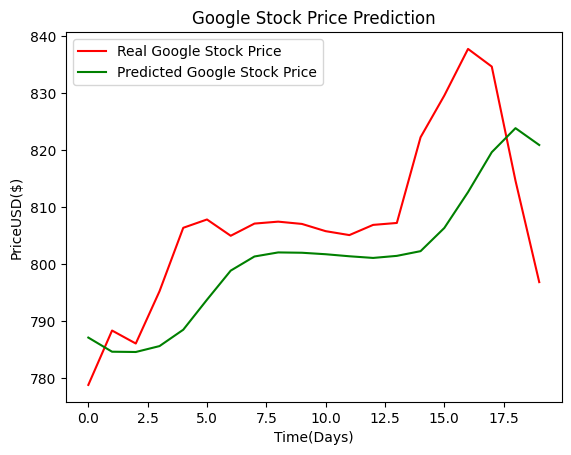

In [39]:
#Visualizing the results:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='green',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time(Days)')
plt.ylabel('PriceUSD($)')
plt.legend()
# plt.figlegend()
plt.show()